In [10]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [11]:
newspaper_data=pd.read_csv('/Users/viswanathareddy/Downloads/NewspaperData.csv')
newspaper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [12]:
newspaper_data.shape 

(34, 3)

In [13]:
newspaper_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [14]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

In [15]:
##Linearity Test

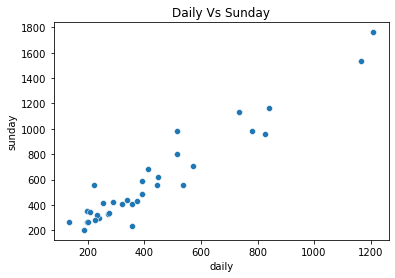

In [16]:
sns.scatterplot(x='daily',y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

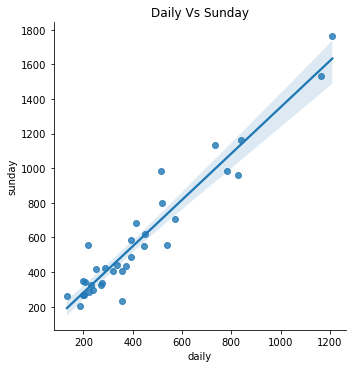

In [17]:
sns.lmplot(x='daily',y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

In [18]:
#Linearity test fail 

#2. Normality  test 

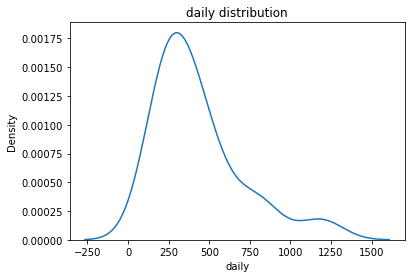

In [19]:
sns.distplot(a=newspaper_data['daily'],hist=False)
plt.title('daily distribution')
plt.show()

In [20]:
#Normality test fail

# 3.No multicollinearity 
#Canot be checked here. 

# No auto Regression 
#Here we dont have input features with datatime datatype. 

# Homoscadasticity Check || 6.Zero Residual Mean 
#This can be performed only after Model Training 

# Data preparation 

In [21]:
newspaper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [22]:
del newspaper_data['Newspaper']

In [23]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [24]:
newspaper_data.dtypes

daily     float64
sunday    float64
dtype: object

In [25]:
newspaper_data.isna().sum()

daily     0
sunday    0
dtype: int64

# #5 Model Bulding \\6. Model Traning 
#Linear Regression can be built by using any of the 2 libraries . 
1.Statsmodels 
2.sklern

In [26]:
#Using Statsmodels 

In [27]:
import statsmodels.formula.api as smf

In [28]:
linear_model =smf.ols(formula='sunday~daily',data=newspaper_data).fit()

In [29]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

#Model Testing       

In [30]:
#Manual Prediction 

In [31]:
#y=mx+c
#if x=200,y=??
(1.339715 * 200)+13.835630

281.77862999999996

In [32]:
#If x=300,y=??
(1.339715 * 300)+ 13.835630

415.75012999999996

In [33]:
#If x=400 , y=??
(1.339715*400)+ 13.835630

549.72163

# Automatic Prediction 

In [34]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [42]:
X_text = pd.DataFrame(data={'daily':[200,300,400]})
X_text

,daily
0,200
1,300
2,400


In [43]:
linear_model.predict(X_text)

0    281.778581
1    415.750057
2    549.721533
dtype: float64

# Model Evaluation

##___________PARK________

# Model Deployment

In [44]:
from pickle import dump

In [45]:
dump(linear_model,open('newspaper_intell.pkl','wb'))

In [46]:
from pickle import load

In [47]:
loaded_intelligence_file = load(open('newspaper_intell.pkl','rb'))

In [50]:
loaded_intelligence_file.predict(X_text)

0    281.778581
1    415.750057
2    549.721533
dtype: float64

In [51]:
##The End 